# **Exploración inicial de los datos de emisiones vehiculares**
## Proyecto de Deep Learning - Predicción de NOx

In [ ]:
# ============================================================
# Configuración del entorno
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path

# Reproducibilidad
SEED = 42
np.random.seed(SEED)



print("Librerías importadas.")


Librerías importadas.


In [ ]:
import pandas as pd


url_etios = "https://drive.google.com/uc?export=download&id=1FExXO0NzOWPCGeLVerHClndAMaASocSc"
url_figo  = "https://drive.google.com/uc?export=download&id=10SvGG6Rj0xHwwO4bkutR3DY_wipxtBN7"
url_rrv   = "https://drive.google.com/uc?export=download&id=1U-SjwjE3AfPpMGrhWVq-ecsQwNjVseO-"

etios = pd.read_csv(url_etios)
figo  = pd.read_csv(url_figo)
rrv   = pd.read_csv(url_rrv)




In [ ]:
# ============================================================
# Información general
# ============================================================

for name, df in zip(["Etios", "Figo", "RRV"], [etios, figo, rrv]):
    print("="*60)
    print(name)
    print(df.head())
    print(df.info())
    print(df.describe().T)


Etios
                       date  trip  driver  route  load  coldStart   gps_lat  \
0  2022-11-15T07:34:17.915Z     1       4      1     0       True -25.75374   
1  2022-11-15T07:34:18.115Z     1       4      1     0       True -25.75374   
2  2022-11-15T07:34:18.315Z     1       4      1     0       True -25.75374   
3  2022-11-15T07:34:18.516Z     1       4      1     0       True -25.75374   
4  2022-11-15T07:34:18.716Z     1       4      1     0       True -25.75374   

     gps_lon  gps_alt  gps_speed  ...  O2_wet_conc  CO2_mass  CO_mass  \
0  28.228008   1222.0        0.0  ...       2.9274     0.863  0.11817   
1  28.228008   1222.0        0.0  ...       2.6813     0.859  0.11218   
2  28.228008   1221.9        0.0  ...       2.4746     0.886  0.10825   
3  28.228008   1221.9        0.0  ...       2.3018     0.903  0.10093   
4  28.228008   1221.9        0.0  ...       2.1555     0.922  0.09367   

   NO_mass  NO2_mass  NOx_mass  O2_mass  NO_mass_cor  NO2_mass_cor  \
0  0.00108

In [ ]:
# ============================================================
# Conversión del timestamp
# ============================================================

def fix_timestamp(df):
    for col in df.columns:
        if df[col].dtype == "object":
            try:
                df[col] = pd.to_datetime(df[col])
                print(f"Timestamp detectado en columna {col}")
                return df
            except:
                pass
    return df

etios = fix_timestamp(etios)
figo  = fix_timestamp(figo)
rrv   = fix_timestamp(rrv)


Timestamp detectado en columna date
Timestamp detectado en columna date
Timestamp detectado en columna <!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv="content-type" content="text/html; charset=utf-8"/><style nonce="UDSJ74rTym1fGPcmqam9BA">.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial


In [ ]:
# ============================================================
# Detección de variables numéricas
# ============================================================

numeric_cols = etios.select_dtypes(include=[np.number]).columns.tolist()

print("Variables numéricas detectadas:")
numeric_cols


Variables numéricas detectadas:


['trip',
 'driver',
 'route',
 'load',
 'gps_lat',
 'gps_lon',
 'gps_alt',
 'gps_speed',
 'humidity',
 'pressure',
 'temp',
 'rpm',
 'speed_vehicle',
 'throttle',
 'manifold_pressure',
 'manifold_temp',
 'coolant_temp',
 'fuel_flow',
 'fuel_rate',
 'air_fuel_ratio',
 'exh_humidity',
 'exh_mass_flow',
 'exh_flow_scfm',
 'exh_flow_ls',
 'exh_temp',
 'CO2_amb_conc',
 'CO_amb_conc',
 'NO_amb_conc',
 'NO2_amb_conc',
 'O2_amb_conc',
 'CO2_wet_conc',
 'CO_wet_conc',
 'NO_wet_conc',
 'NO2_wet_conc',
 'NOx_wet_conc',
 'O2_wet_conc',
 'CO2_mass',
 'CO_mass',
 'NO_mass',
 'NO2_mass',
 'NOx_mass',
 'O2_mass',
 'NO_mass_cor',
 'NO2_mass_cor',
 'NOx_mass_cor']

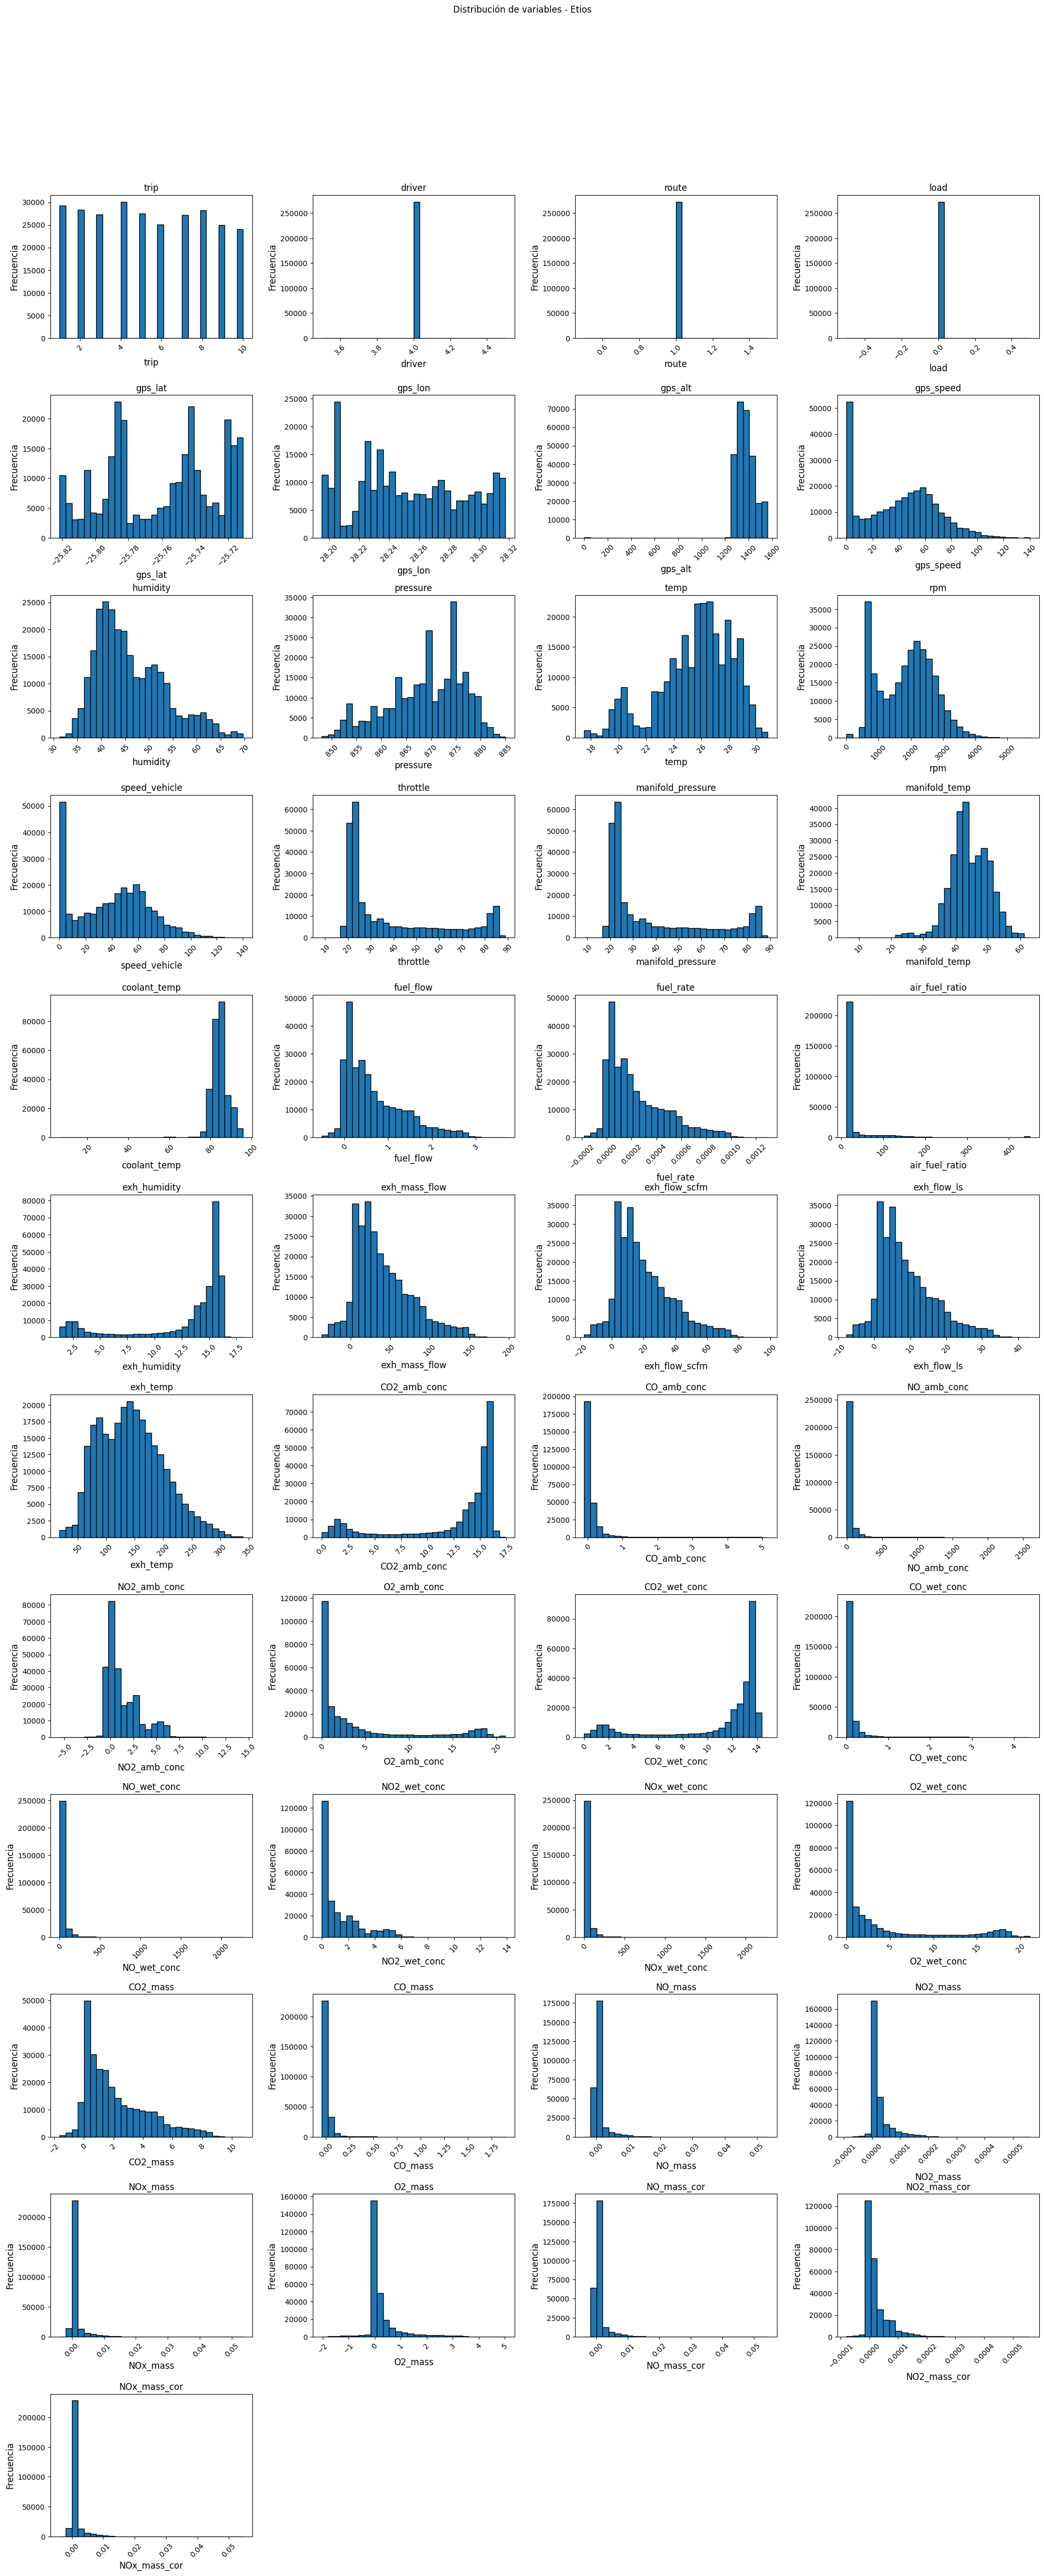

In [ ]:
# ...existing code...
# ============================================================
# Histogramas (organizados)
# ============================================================
import math

n = len(numeric_cols)
cols = 4                 # cambia a 3/4 según prefieras
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    data = etios[col].dropna()
    ax.hist(data, bins=30, color="C0", edgecolor="black")
    ax.set_title(col, fontsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.tick_params(axis="x", labelrotation=45)   # rota etiquetas X

# ocultar ejes sobrantes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribución de variables - Etios", y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96], pad=1.2)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()
# ...existing code...

Variable objetivo detectada:  NOx_wet_conc


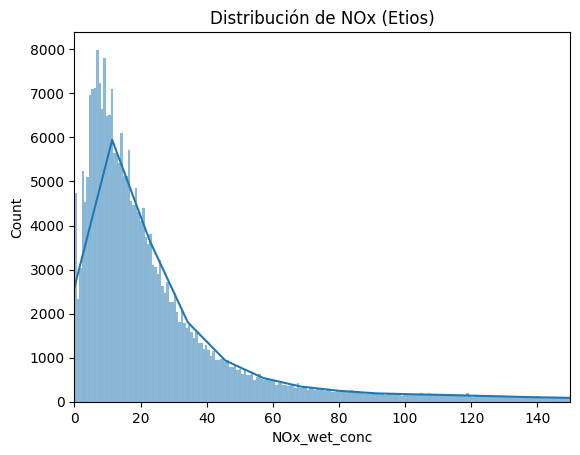

In [ ]:
# ============================================================
# Análisis de la variable objetivo NOx
# ============================================================

targets = ["nox", "NOx", "NOX", "nox_ppm"]
target_col = None

for col in numeric_cols:
    if "nox" in col.lower():
        target_col = col
        break

print("Variable objetivo detectada: ", target_col)

sns.histplot(etios[target_col], kde=True)
plt.title("Distribución de NOx (Etios)")
plt.xlim(0,150)
plt.show()


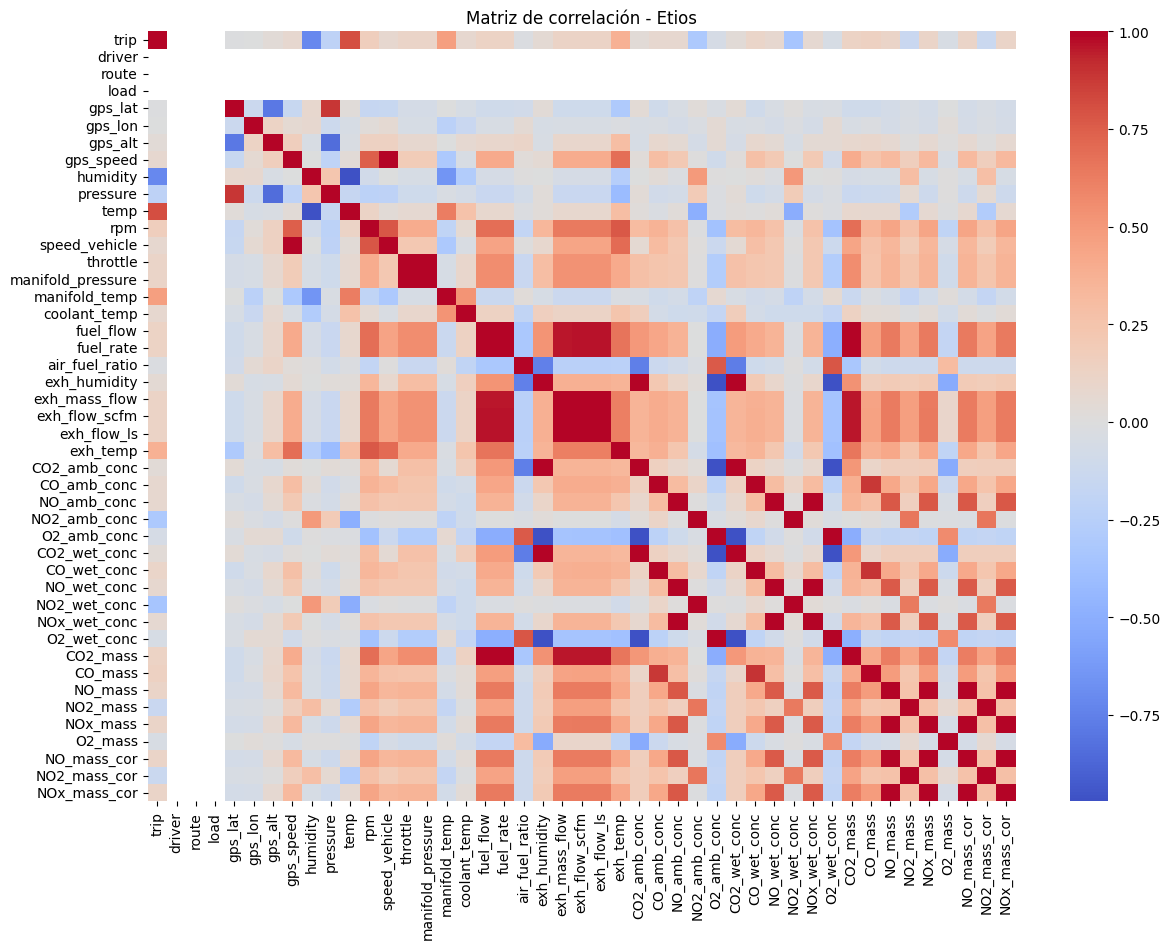

In [ ]:
# ============================================================
# Matriz de correlación
# ============================================================

plt.figure(figsize=(14,10))
sns.heatmap(etios[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación - Etios")
plt.show()


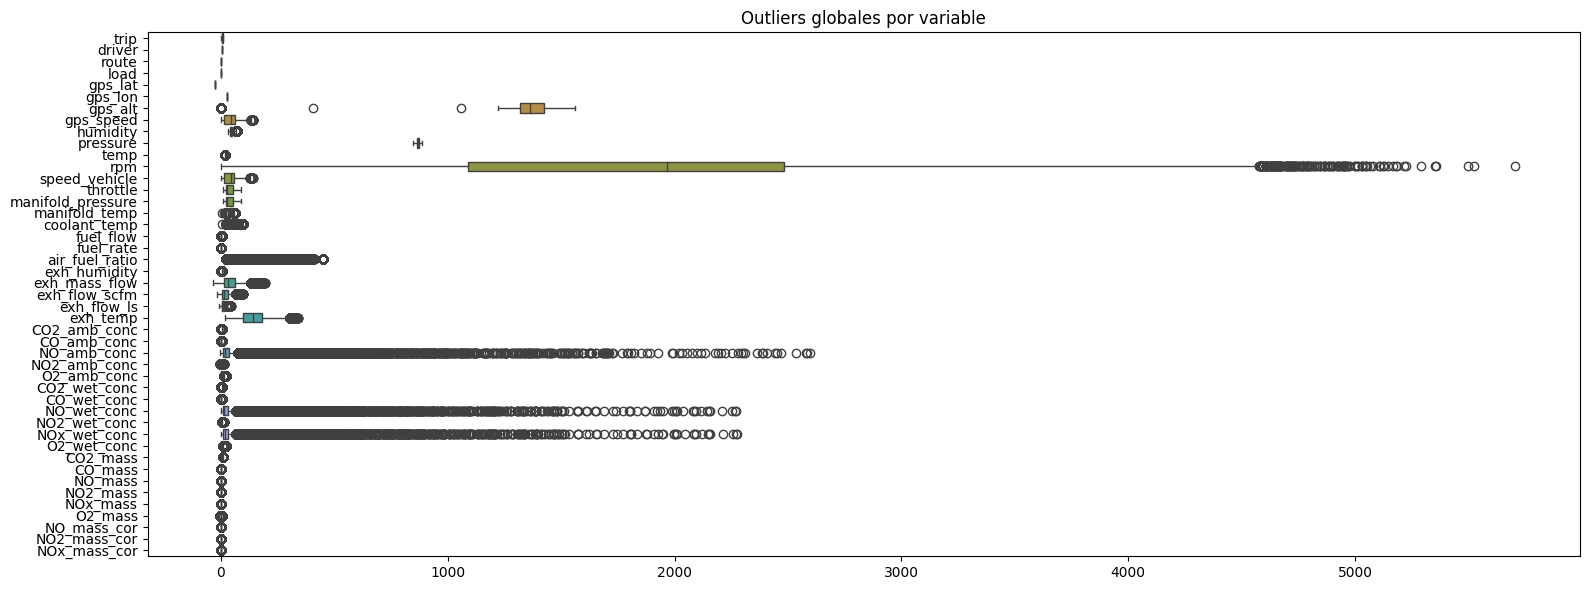

In [ ]:
# ============================================================
# Boxplots para outliers
# ============================================================

plt.figure(figsize=(16,6))
sns.boxplot(data=etios[numeric_cols], orient='h')
plt.title("Outliers globales por variable")
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# Conclusiones principales del EDA
# ============================================================

conclusiones = """
1. Los datasets se cargaron correctamente y contienen información típica de sensores vehiculares.
2. Se identificó la variable objetivo NOx: {}.
3. La distribución de NOx es altamente asimétrica, con colas largas.
4. Existen correlaciones claras entre RPM, carga motor, flujo de aire y NOx.
5. Existen outliers que probablemente requieran normalización robusta o tratamiento explícito.
6. Las series temporales parecen adecuadas para modelos CNN y LSTM.
7. No se detecta ningún problema que impida el preprocesamiento y ventaneo en el Notebook 02.
""".format(target_col)

print(conclusiones)



1. Los datasets se cargaron correctamente y contienen información típica de sensores vehiculares.
2. Se identificó la variable objetivo NOx: NOx_wet_conc.
3. La distribución de NOx es altamente asimétrica, con colas largas.
4. Existen correlaciones claras entre RPM, carga motor, flujo de aire y NOx.
5. Existen outliers que probablemente requieran normalización robusta o tratamiento explícito.
6. Las series temporales parecen adecuadas para modelos CNN y LSTM.
7. No se detecta ningún problema que impida el preprocesamiento y ventaneo en el Notebook 02.

